# **Project: "STROKE PREDICTION"**
---

# **Laiba Memon**

---

# **IMPORTING THE REQUIRED LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



In [2]:
# LOADING THE DATASET
data=pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head() # Printing the Starting 5 columns of the dataset

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

# **DATA PREPROCESSING AND EDA**

In [3]:
data.tail() # PRINTING the last 5 Columns of the dataset

id  gender   age  hypertension  heart_disease ever_married  \
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0

In [5]:
data.shape # Shape method shows the total number of rows and columns in the dataset

(5110, 12)

In [4]:
data.isnull().sum() # isnull method is used to check is any null value exists in our dataset or not?

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
data['bmi'].fillna(0, inplace = True)

In [7]:
data.drop('id',axis=1,inplace=True)

In [8]:
data.isnull().sum() # now there is no any null value exists in our dataset

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
data.nunique()  # nunique method will print the unique values on each column

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [10]:
data.info() # info method is used to check the datatypes of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [11]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [12]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

# **Data Visualization**

Text(0.5, 1.0, 'Correlation between different attributes')

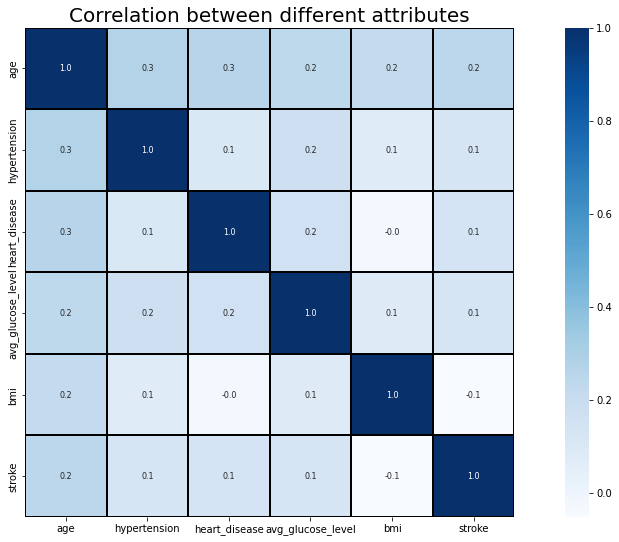

In [89]:
plt.figure(figsize=(18,9))
corr =sns.heatmap(data.corr(),cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues',linewidths=0.2,linecolor='black')
corr.set_title('Correlation between different attributes',fontsize=20)

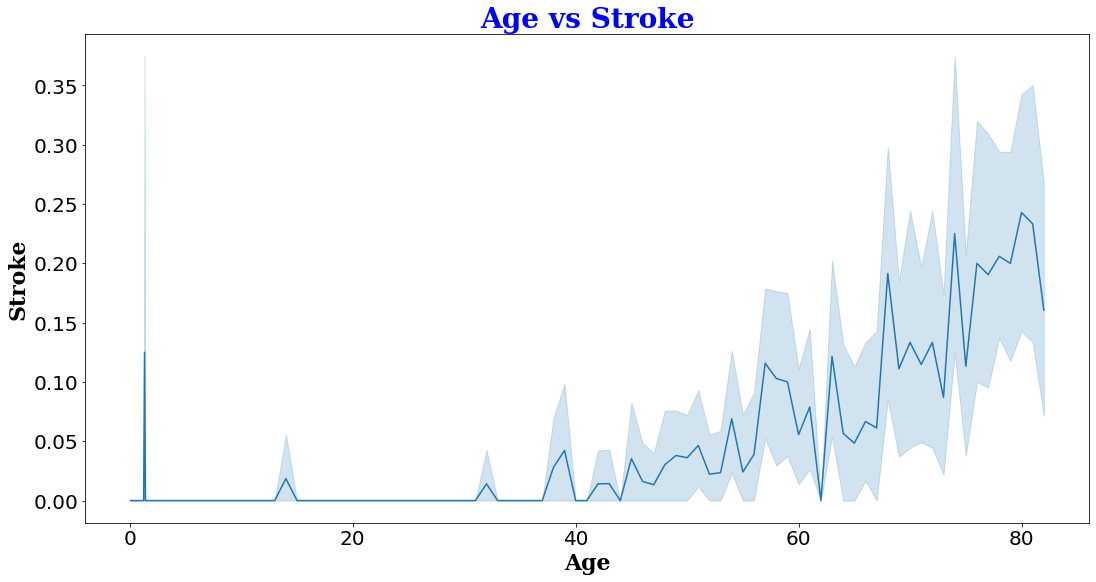

In [39]:
plt.figure(figsize=(18,9))
fig1 = sns.lineplot(x='age', y='stroke', data=data)
fig1.set_title('Age vs Stroke', fontsize=28, fontweight='bold', fontfamily='serif', color='blue', loc='center')
fig1.set_xlabel('Age', fontsize=22, fontweight='bold', fontfamily='serif', color='black')
fig1.set_ylabel('Stroke', fontsize=22, fontweight='bold', fontfamily='serif', color='black')
fig1.tick_params(labelsize=20, labelcolor='black')

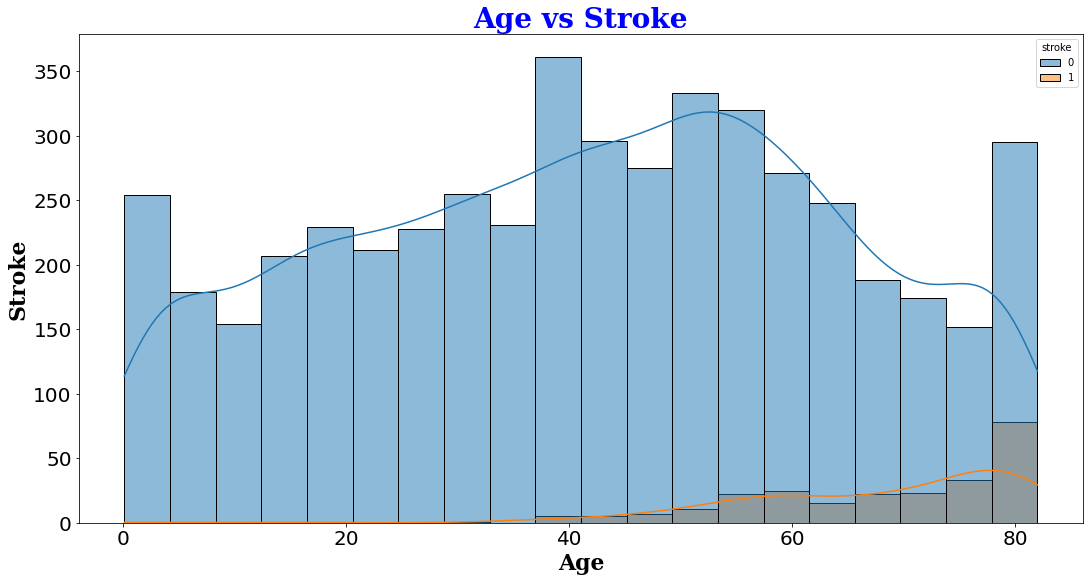

In [38]:
plt.figure(figsize=(18,9))
fig2 = sns.histplot(x='age', data=data, hue='stroke', kde=True)
fig2.set_title('Age vs Stroke', fontsize=28, fontweight='bold', fontfamily='serif', color='blue', loc='center')
fig2.set_xlabel('Age', fontsize=22, fontweight='bold', fontfamily='serif', color='black')
fig2.set_ylabel('Stroke', fontsize=22, fontweight='bold', fontfamily='serif', color='black')
fig2.tick_params(labelsize=20, labelcolor='black')

In [44]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [54]:
plt.figure(figsize=(18,9))
fig3 = px.histogram(data, x='gender', y='heart_disease', color='stroke', marginal='box', hover_data=data.columns)
fig3.update_layout(title_text='Heart Disease According to Gender', title_x=0.5, title_font_size=28, title_font_family='serif', title_font_color='blue')
fig3.show()

<Figure size 1296x648 with 0 Axes>

<Figure size 1296x648 with 0 Axes>

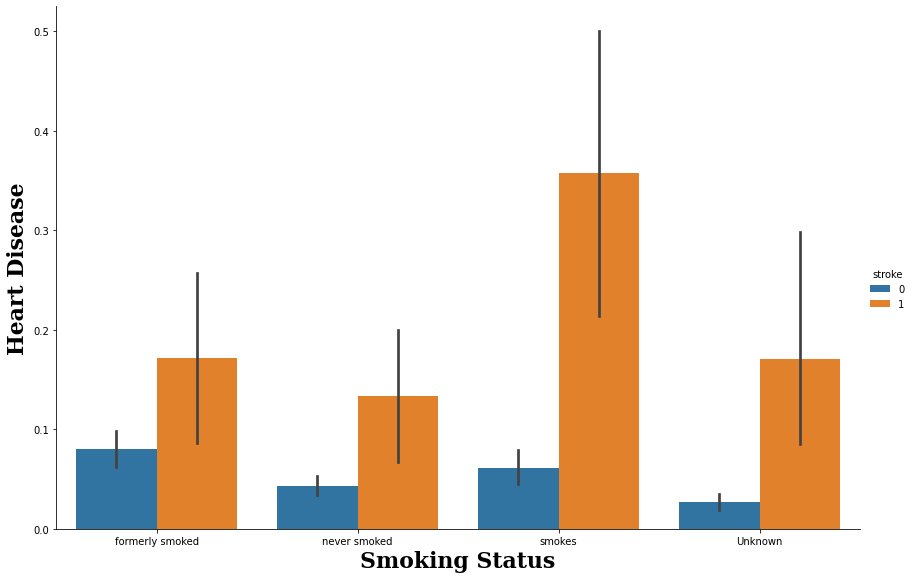

In [65]:
plt.figure(figsize=(18,9))
fig4 = sns.catplot(x='smoking_status', y='heart_disease', data=data, hue='stroke', kind='bar', height=8, aspect=1.5)
fig4.set_xlabels('Smoking Status', fontsize=22, fontweight='bold', fontfamily='serif', color='black')
fig4.set_ylabels('Heart Disease', fontsize=22, fontweight='bold', fontfamily='serif', color='black')

In [70]:
plt.figure(figsize=(18,9))
fig5 = px.scatter(data, x='age', y='avg_glucose_level', color='stroke', marginal_x='box', trendline='ols', hover_data=data.columns)
fig5.update_layout(title_text='Age vs Avg Glucose Level', title_x=0.5, title_font_size=28, title_font_family='serif', title_font_color='blue', xaxis_title='Age', yaxis_title='Avg Glucose Level', xaxis_title_font_size=22, xaxis_title_font_family='serif', xaxis_title_font_color='black', yaxis_title_font_size=22, yaxis_title_font_family='serif', yaxis_title_font_color='black', xaxis_tickfont_size=20, xaxis_tickfont_color='black', yaxis_tickfont_size=20, yaxis_tickfont_color='black')
fig5.show()

<Figure size 1296x648 with 0 Axes>

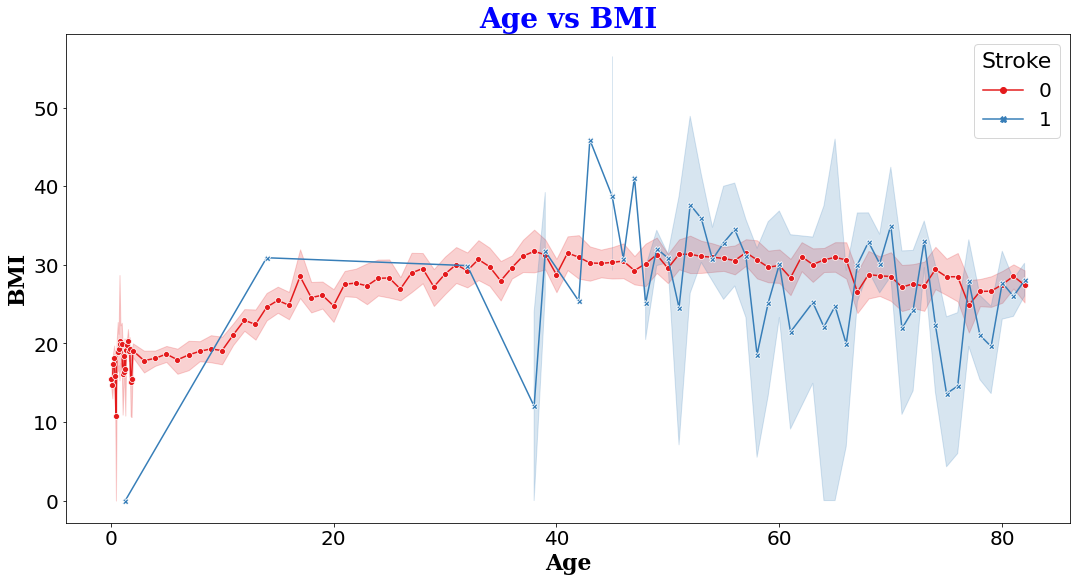

In [77]:
plt.figure(figsize=(18,9))
fig6 = sns.lineplot(x='age', y='bmi', data=data, hue='stroke', style='stroke', markers=True, dashes=False, palette='Set1', legend='full')
fig6.set_title('Age vs BMI', fontsize=28, fontweight='bold', fontfamily='serif', color='blue', loc='center')
fig6.set_xlabel('Age', fontsize=22, fontweight='bold', fontfamily='serif', color='black')
fig6.set_ylabel('BMI', fontsize=22, fontweight='bold', fontfamily='serif', color='black')
fig6.tick_params(labelsize=20, labelcolor='black')
fig6.legend(fontsize=20, title_fontsize=22, title='Stroke')

c:\Users\Ali Hasnain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='age', ylabel='Density'>

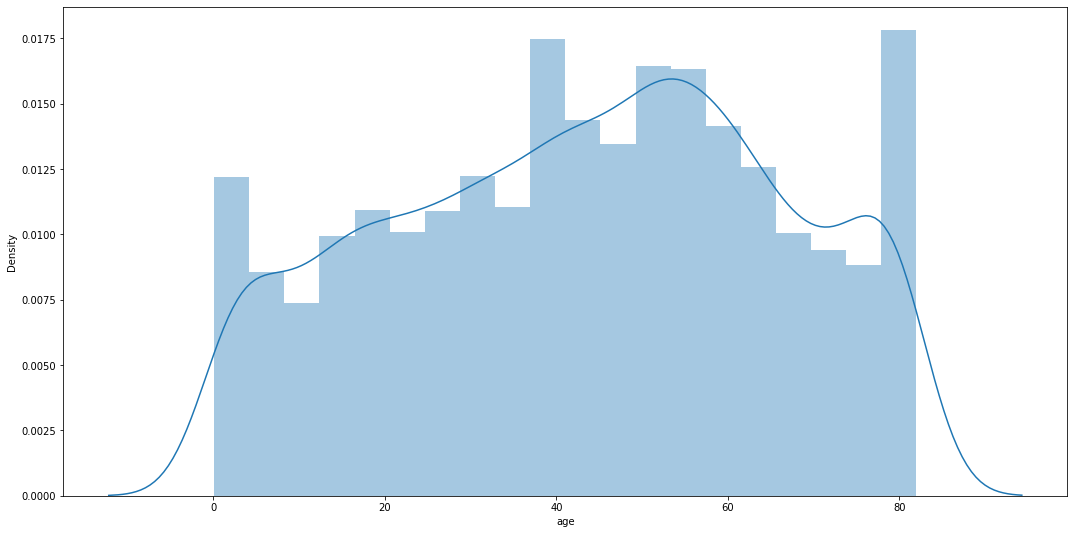

In [78]:
plt.figure(figsize=(18,9))
sns.distplot(data['age'])

c:\Users\Ali Hasnain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\Ali Hasnain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1718: UserWarning:

`shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.

c:\Users\Ali Hasnain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1210: UserWarning:

linewidths is ignored by contourf



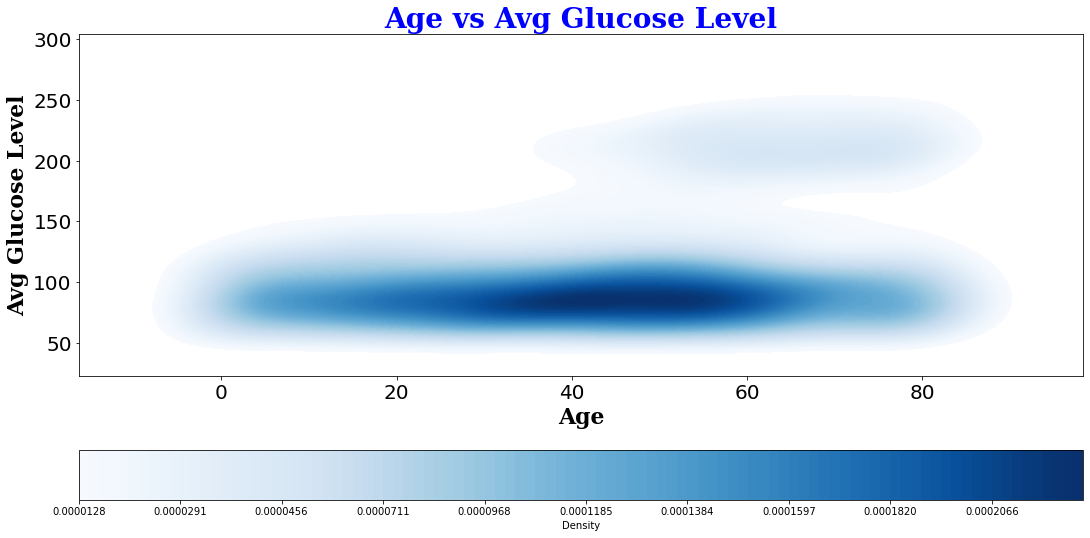

In [98]:
plt.figure(figsize=(18,9))
fig7 = sns.kdeplot(data['age'], data['avg_glucose_level'], shade=True, shade_lowest=False, cmap='Blues', cbar=True, cbar_kws={'orientation':'horizontal', 'label':'Density'}, levels=100, linewidths=0.5)
fig7.set_title('Age vs Avg Glucose Level', fontsize=28, fontweight='bold', fontfamily='serif', color='blue', loc='center')
fig7.set_xlabel('Age', fontsize=22, fontweight='bold', fontfamily='serif', color='black')
fig7.set_ylabel('Avg Glucose Level', fontsize=22, fontweight='bold', fontfamily='serif', color='black')
fig7.tick_params(labelsize=20, labelcolor='black')


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


# EXPLORATORY DATA ANALYSIS

In [14]:
# the Object Datatype is not tolerable in any project so we need to convert this into int datatype
model=LabelEncoder()
list=['gender','ever_married','work_type','smoking_status','Residence_type']
for i in list:
    data[i]=model.fit_transform(data[i])
data

gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          2   
1          0  61.0             0              0             1          3   
2          1  80.0             0              1             1          2   
3          0  49.0             0              0             1          2   
4          0  79.0             1              0             1          3   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          2   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   
5109       0  44.0             0              0             1          0   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0                  1             228.69  36.6               1       1  
1                  0             202.21   0.0               2       1  
2                  0             105.92  32.5               2       1  
3                  1             171.23  34.4               3       1  
4                  0             174.12  24.0               2       1  
...              ...                ...   ...             ...     ...  
5105               1              83.75   0.0               2       0  
5106               1             125.20  40.0               2       0  
5107               0              82.99  30.6               2       0  
5108               0             166.29  25.6               1       0  
5109               1              85.28  26.2               0       0  

[5110 rows x 11 columns]

# FEATURE EXTRACTION

In [16]:
x=data.drop('stroke',axis=1)
y=data['stroke']

In [17]:
print(x)


      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          2   
1          0  61.0             0              0             1          3   
2          1  80.0             0              1             1          2   
3          0  49.0             0              0             1          2   
4          0  79.0             1              0             1          3   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          2   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   
5109       0  44.0             0              0             1          0   

      Residence_type  avg_glucose_level   bmi  smoking_status  
0                  1   

In [18]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64


In [22]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x=std.fit_transform(x)
print(x)


[[ 1.18807255  1.05143428 -0.32860186 ...  2.70637544  0.92807976
  -0.35178071]
 [-0.840344    0.78607007 -0.32860186 ...  2.12155854 -2.91300238
   0.58155233]
 [ 1.18807255  1.62639008 -0.32860186 ... -0.0050283   0.4977946
   0.58155233]
 ...
 [-0.840344   -0.36384151 -0.32860186 ... -0.51144264  0.29839416
   0.58155233]
 [ 1.18807255  0.34379639 -0.32860186 ...  1.32825706 -0.22634384
  -0.35178071]
 [-0.840344    0.03420481 -0.32860186 ... -0.46086746 -0.16337528
  -1.28511375]]


# DATA MODELLING

# 1) LOGISTIC REGRESSION ALGORITHM

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x.shape,x_train.shape,x_test.shape

((5110, 10), (4088, 10), (1022, 10))

In [25]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()



In [26]:
model.fit(x_train,y_train)
print('Accuracy on Training Data',model.score(x_train,y_train)*100)
print('Accuracy on testing Data',model.score(x_test,y_test)*100)


Accuracy on Training Data 95.18101761252447
Accuracy on testing Data 94.6183953033268


In [27]:
y_pred=model.predict(x_test)
print(y_pred)


[0 0 0 ... 0 0 0]


# MAKING A PREDICTIVE MODEL

In [28]:
print(y_pred.tolist())


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [29]:
data=pd.DataFrame({"actual result":y_test,'predicted result':y_pred})
print(data)

      actual result  predicted result
42                1                 0
380               0                 0
3524              0                 0
352               0                 0
4927              0                 0
...             ...               ...
472               0                 0
4446              0                 0
660               0                 0
57                1                 0
2367              0                 0

[1022 rows x 2 columns]


# 2) DECISION TREE CLASSIFIER ALGORITHM

In [34]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
print('Accuracy on Training Data',model.score(x_train,y_train)*100)
print('Accuracy on testing Data',model.score(x_test,y_test)*100)

Accuracy on Training Data 100.0
Accuracy on testing Data 91.0958904109589


In [35]:
y_pred=model.predict(x_test)
print(y_pred)


[0 0 0 ... 0 0 0]


# MAKING A PREDICTIVE MODEL

In [36]:
print(y_pred.tolist())


[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [37]:
data=pd.DataFrame({"actual result":y_test,'predicted result':y_pred})
print(data)

      actual result  predicted result
42                1                 0
380               0                 0
3524              0                 0
352               0                 0
4927              0                 0
...             ...               ...
472               0                 0
4446              0                 0
660               0                 0
57                1                 0
2367              0                 0

[1022 rows x 2 columns]
